In [1]:
import os
import pandas as pd

In [2]:
business = pd.read_json("../0_data/1_raw_data/business.json",
                       lines=True)

In [3]:
business.shape

(192609, 14)

In [4]:
def split_cats(text):
    try:
        return x.split(", ")
    except:
        return []

In [5]:
condition2 = business["categories"].apply(lambda x: "restaurant" in split_cats(x))

In [6]:
business_open = business[business["is_open"]==1 & condition2]

In [7]:
business_open.shape

(34084, 14)

In [8]:
business_open.columns

Index(['address', 'attributes', 'business_id', 'categories', 'city', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state'],
      dtype='object')

In [9]:
stars = business_open.groupby("stars").count()["address"].reset_index()

In [10]:
stars.columns = ["stars", "count"]

In [11]:
stars.shape

(9, 2)

In [12]:
stars

,stars,count
0,1.0,600
1,1.5,797
2,2.0,1951
3,2.5,3600
4,3.0,5950
5,3.5,7465
6,4.0,6848
7,4.5,4099
8,5.0,2774


#### Get graph of stars distribution

In [13]:
import matplotlib.pyplot as plt

<BarContainer object of 9 artists>

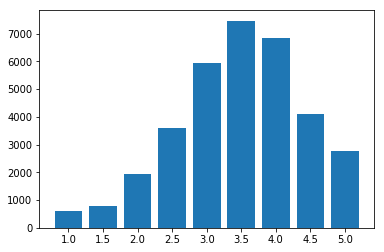

In [14]:
plt.bar(stars["stars"].apply(lambda x: str(x)), stars["count"])

try with seaborn

In [15]:
import seaborn as sns

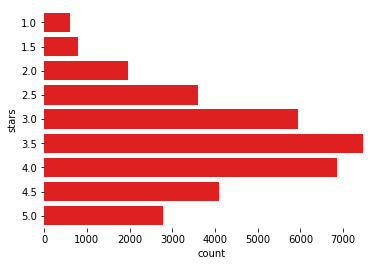

In [16]:
sns.barplot(y=stars["stars"].apply(lambda x: str(x)), x=stars["count"],
            color="red", orient="h")
sns.despine(left=True, bottom=True)

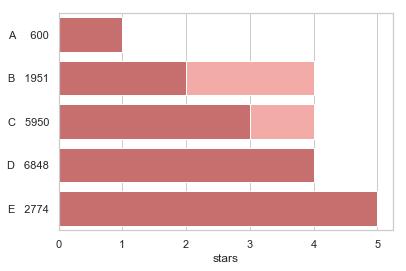

In [17]:
sns.set(style="whitegrid")

tmp_data = pd.DataFrame({"col1": [1, 4, 4, 4, 5],
                         "col2": ["A     600", "B   1951", "C   5950", "D   6848", "E   2774"]})

sns.set_color_codes("pastel")
f, ax = plt.subplots()
sns.barplot(x="col1",
            y="col2",
            data=tmp_data,
            color="r", orient="h")
ax.set(xlabel="stars", ylabel="")

sns.set_color_codes("muted")
sns.barplot(x=[1,2,3,4,5],
            y=["A     600", "B   1951", "C   5950", "D   6848", "E   2774"],
            color="r", orient="h")
ax.set(xlabel="stars", ylabel="")

f.savefig("../3_reports/figures/business_stars2.png")

In [18]:
((1951/1500000) * .2 + (5950/1500000) * .1) * 863000000

566818.4000000001

#### Model Performance

In [20]:
os.chdir("1_feature_engineering")
exec(open("extract_review_features.py").read())

/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [21]:
feature_matrix = produce_feature_matrix(data2)

Preprocessing Stem & Join (P): 7.304466485977173
Preprocessing No Stem (P): 5.680806636810303
Preprocessing No Stem & Punct (P): 6.176894187927246
TFIDF: 0.21582961082458496
Topics: 0.9059181213378906


/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Metadata: 1.0993058681488037


/home/richard/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:354: RuntimeWarning: invalid value encountered in double_scalars


Syntax: 44.69997501373291
Embeddings: 130.93154573440552


In [22]:
feature_matrix.shape

(1050, 459)

In [23]:
feature_matrix.head()

,text_formatted,sen_len,sen_avg_len,sen_med_len,sen_money_len,sen_num_len,NOUN,VERB,ADJ,ADV,...,topic_90,topic_91,topic_92,topic_93,topic_94,topic_95,topic_96,topic_97,topic_98,topic_99
0,In my dream world this amazing incredible plac...,65,4.062500,5.0,0,0,-0.889222,-0.718838,-0.823667,-0.943411,...,0.001000,0.001000,0.001000,0.001000,0.001000,0.236909,0.001000,0.001000,0.001000,0.001000
1,Pretty good ramen. It honestly wasn't quite a...,100,4.347826,4.0,1,0,-0.791382,-0.641034,-0.823667,0.057682,...,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526,0.000526
2,First time there chicken for both me and my wi...,480,4.571429,5.0,1,6,0.627291,0.992857,0.397608,0.391380,...,0.193696,0.000132,0.000132,0.122451,0.120293,0.000132,0.000132,0.000132,0.000132,0.000132
3,The staff is friendly and service is done quic...,98,4.454545,4.5,0,0,-0.693543,-0.718838,-0.917611,-0.776562,...,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556,0.000556
4,I originally gave Main Ingredient two stars ba...,898,4.338164,4.0,1,6,2.143805,0.759444,2.370435,1.225624,...,0.084085,0.000090,0.000090,0.000090,0.000090,0.017087,0.000090,0.000090,0.052086,0.027683


In [24]:
feature_matrix = feature_matrix.fillna(0)

In [25]:
target = data[["food", "service", "price", "ambiance"]]

In [26]:
exec(open("iterative_stratification.py").read())

In [27]:
X_tmp, y_tmp, X_test, y_test = iterative_train_test_split(
    np.array(feature_matrix),
    np.array(target),
    test_size=0.4,
    random_state=10191994)

X_train, y_train, X_validation, y_validation = iterative_train_test_split(
    X_tmp,
    y_tmp,
    test_size=0.3,
    random_state=10191994)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
clf = RandomForestClassifier(n_estimators=1000,
                             max_depth=3,
                             min_samples_leaf=10,
                             max_features=0.6,
                             random_state=10191994,
                             n_jobs=-1)

In [31]:
feature_matrix.columns[1:4]

Index(['sen_len', 'sen_avg_len', 'sen_med_len'], dtype='object')

In [32]:
feature_matrix.columns[4:148]

Index(['sen_money_len', 'sen_num_len', 'NOUN', 'VERB', 'ADJ', 'ADV', '.',
       'ADP', 'NUM', 'PRON',
       ...
       'CONJ_X', 'X_NOUN', 'X_VERB', 'X_ADJ', 'X_ADV', 'X_.', 'X_ADP', 'X_NUM',
       'X_PRON', 'X_PRT'],
      dtype='object', length=144)

In [33]:
feature_matrix.columns[148:168]

Index(['X_DET', 'X_CONJ', 'food_3avg_sim', 'delicious_3avg_sim',
       'service_3avg_sim', 'staff_3avg_sim', 'price_3avg_similarity',
       'cost_3avg_similarity', 'ambiance_3avg_similarity',
       'patio_3avg_similarity', 'loud_3avg_similarity', 'also', 'alway',
       'amaz', 'around', 'ask', 'back', 'bar', 'best', 'better'],
      dtype='object')

In [34]:
feature_matrix.columns[168:268]

Index(['bit', 'buffet', 'burger', 'came', 'chees', 'chicken', 'come', 'could',
       'day', 'definit', 'delici', 'dessert', 'dinner', 'dish', 'drink', 'eat',
       'enjoy', 'even', 'everyth', 'experi', 'favorit', 'first', 'flavor',
       'food', 'fresh', 'fri', 'friend', 'get', 'go', 'good', 'got', 'great',
       'hour', 'know', 'like', 'littl', 'locat', 'look', 'lot', 'love', 'made',
       'make', 'meal', 'meat', 'menu', 'much', 'next', 'nice', 'night', 'one',
       'order', 'peopl', 'pizza', 'place', 'pretti', 'price', 're', 'realli',
       'recommend', 'restaur', 'right', 'room', 'salad', 'sauc', 'say', 'seat',
       'serv', 'server', 'servic', 'side', 'star', 'still', 'sweet', 'tabl',
       'take', 'tast', 'thing', 'think', 'time', 'top', 'tri', 'two', 'us',
       've', 'vega', 'wait', 'want', 'way', 'well', 'went', 'would',
       '10 minut', '15 minut', '20 minut', 'also order', 'back tri',
       'best part', 'ca wait', 'came back', 'chicken waffl'],
      dtype='objec

In [35]:
feature_matrix.columns[268:368]

Index(['come back', 'cook perfectli', 'crab leg', 'custom servic',
       'definit back', 'definit come', 'definit worth', 'dim sum',
       'dine experi', 'even though', 'everi time', 'feel like', 'felt like',
       'first time', 'foie gra', 'food came', 'food good', 'food great',
       'food servic', 'french toast', 'fri chicken', 'fri rice', 'gave us',
       'give place', 'go back', 'go wrong', 'good food', 'good servic',
       'good thing', 'great food', 'great place', 'great servic', 'happi hour',
       'highli recommend', 'ice cream', 'la vega', 'last night', 'last time',
       'late night', 'like place', 'littl bit', 'long time', 'look forward',
       'look like', 'love place', 'mac chees', 'make reserv', 'make sure',
       'mash potato', 'medium rare', 'melt mouth', 'much better', 'must tri',
       'new york', 'next time', 'noth special', 'one best', 'one favorit',
       'one thing', 'place go', 'pork belli', 'pretti good', 'pretti much',
       'prime rib', 'qualiti 

In [36]:
target.describe()

,food,service,price,ambiance
count,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.908571,0.637143,0.263810,0.404762
std,0.288355,0.481053,0.440907,0.491080
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


#### Food

In [37]:
import pickle

In [38]:
def train_model(index):
    if index == 0:
        model = "food"
    elif index == 1:
        model = "service"
    elif index == 2:
        model = "price"
    elif index == 3:
        model = "ambiance"
        
    score_metadata = clf.fit(pd.DataFrame(X_train[:, 1:4])
                             , y_train[:, index]
        ).score(pd.DataFrame(X_validation[:, 1:4])
                , y_validation[:, index])
    score_syntax = clf.fit(pd.DataFrame(X_train[:, 1:148])
                           , y_train[:, index]
        ).score(pd.DataFrame(X_validation[:, 1:148])
                , y_validation[:, index])
    score_embeddings = clf.fit(pd.DataFrame(X_train[:, 1:168])
                               , y_train[:, index]
        ).score(pd.DataFrame(X_validation[:, 1:168])
                , y_validation[:, index])
    score_tfidf = clf.fit(pd.DataFrame(X_train[:, 1:268])
                          , y_train[:, index]
        ).score(pd.DataFrame(X_validation[:, 1:268])
                , y_validation[:, index])
    score_topics = clf.fit(pd.DataFrame(X_train[:, 1:368])
                           , y_train[:, index]
        ).score(pd.DataFrame(X_validation[:, 1:368])
                , y_validation[:, index])
    with open(
        "../../4_models/rf_{}_50iterations_0.8threshold.pickle"
        .format(model), "rb") as f:
        clf_pseudolabel = pickle.load(f)
        
        score_pseudolabel = clf_pseudolabel.fit(
            pd.DataFrame(X_train[:, 1:368])
            , y_train[:, index]
            ).score(pd.DataFrame(X_validation[:, 1:368])
                    , y_validation[:, index])
        return [score_metadata,
                score_syntax,
                score_embeddings,
                score_tfidf,
                score_topics,
                score_pseudolabel]

In [39]:
food = train_model(0)
service = train_model(1)
price = train_model(2)
ambiance = train_model(3)

In [40]:
food = [0.908571] + food
food

[0.908571,
 0.9148936170212766,
 0.9148936170212766,
 0.925531914893617,
 0.9202127659574468,
 0.9202127659574468,
 0.9202127659574468]

In [41]:
service = [0.637143] + service
service

[0.637143,
 0.6382978723404256,
 0.6382978723404256,
 0.8404255319148937,
 0.824468085106383,
 0.824468085106383,
 0.824468085106383]

In [42]:
price = [1-0.263810] + price
price

[0.73619,
 0.7340425531914894,
 0.776595744680851,
 0.8138297872340425,
 0.8563829787234043,
 0.851063829787234,
 0.851063829787234]

In [43]:
ambiance = [1-0.404762] + ambiance
ambiance

[0.5952379999999999,
 0.6276595744680851,
 0.6382978723404256,
 0.824468085106383,
 0.8191489361702128,
 0.8138297872340425,
 0.8138297872340425]

In [44]:
df = pd.DataFrame({"features": ["0 base",
                                "1 metadata",
                                "2 syntax",
                                "3 embeddings",
                                "4 tfidf",
                                "5 topics",
                                "6 pseudolabel"],
                   "food": food,
                   "service": service,
                   "price": price,
                   "ambiance": ambiance})

In [45]:
df

,features,food,service,price,ambiance
0,0 base,0.908571,0.637143,0.736190,0.595238
1,1 metadata,0.914894,0.638298,0.734043,0.627660
2,2 syntax,0.914894,0.638298,0.776596,0.638298
3,3 embeddings,0.925532,0.840426,0.813830,0.824468
4,4 tfidf,0.920213,0.824468,0.856383,0.819149
5,5 topics,0.920213,0.824468,0.851064,0.813830
6,6 pseudolabel,0.920213,0.824468,0.851064,0.813830


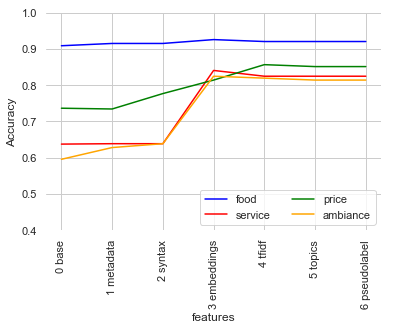

In [46]:
f, ax = plt.subplots()
sns.lineplot(x="features", y="food", markers=True, data=df,
             color="blue", label="food")
sns.lineplot(x="features", y="service", markers=True, data=df,
             color="red", label="service")
sns.lineplot(x="features", y="price", markers=True, data=df,
             color="green", label="price")
sns.lineplot(x="features", y="ambiance", markers=True, data=df,
             color="orange", label="ambiance")
plt.setp(ax.get_xticklabels(), rotation=90)
ax.set(ylabel="Accuracy", ylim=(0.4, 1))
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)
plt.savefig("../../3_reports/figures/model_accuracy_20190613.png")